# **Section B**

## 1. Implement the k-means clustering : Initialization, Assignment, Update, Convergence Check (convergence threshold of 1e-4.)

In [ ]:
import numpy as np

def computeEuclideanDistance(point1, point2):
    differences = point1 - point2
    squaredDifferences = np.sum(differences ** 2)
    distance = np.sqrt(squaredDifferences)
    return distance
    
def initializeCentroids():
    initialCentroids = np.array([[3.0, 3.0], [2.0, 2.0]])
    return initialCentroids

def assignClusters(data, centroids):
    labels = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        distances = [computeEuclideanDistance(data[i], centroid) for centroid in centroids]
        labels[i] = np.argmin(distances)
    return labels

def updateCentroids(data, labels, k):
    newCentroids = np.zeros((k, data.shape[1]))
    for cluster in range(k):
        clusterPoints = data[labels == cluster]
        if len(clusterPoints) > 0:
            newCentroids[cluster] = np.mean(clusterPoints, axis=0)
    return newCentroids

def hasConverged(oldCentroids, newCentroids, threshold):
    totalShift = np.sum(np.abs(newCentroids - oldCentroids))
    return totalShift < threshold

def kMeansClustering(data, k=2, maxIterations=100, threshold=1e-4):
    centroids = initializeCentroids()
    previousCentroids = np.copy(centroids)

    for iteration in range(maxIterations):
        labels = assignClusters(data, centroids)
        updatedCentroids = updateCentroids(data, labels, k)
        if hasConverged(previousCentroids, updatedCentroids, threshold):
            break
        previousCentroids = np.copy(updatedCentroids)
        centroids = updatedCentroids

    return centroids, labels

X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1],
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0],
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

finalCentroids, clusterLabels = kMeansClustering(X)
print("Final Centroids after convergence:")
print(finalCentroids)


Final Centroids after convergence:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


## 2. Final centroids

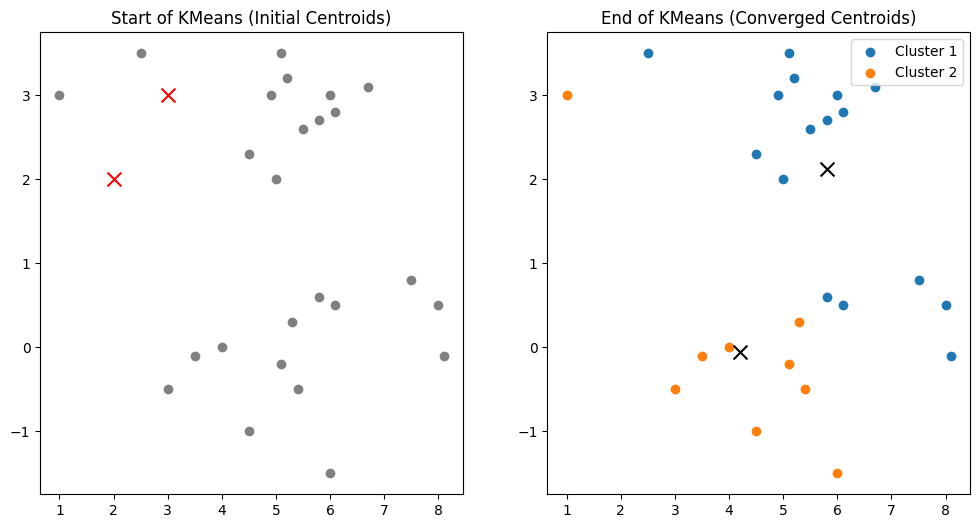

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initializeCentroids():
    return np.array([[3.0, 3.0], [2.0, 2.0]])

def plotClusters(dataPoints, initialCentroids, finalCentroids, labels, numClusters=2):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Start of KMeans (Initial Centroids)")
    plt.scatter(dataPoints[:, 0], dataPoints[:, 1], c='gray')
    plt.scatter(initialCentroids[:, 0], initialCentroids[:, 1], c='red', marker='x', s=100)

    plt.subplot(1, 2, 2)
    plt.title("End of KMeans (Converged Centroids)")
    for clusterIndex in range(numClusters):
        clusterPoints = dataPoints[labels == clusterIndex]
        plt.scatter(clusterPoints[:, 0], clusterPoints[:, 1], label=f"Cluster {clusterIndex + 1}")
    plt.scatter(finalCentroids[:, 0], finalCentroids[:, 1], c='black', marker='x', s=100)
    plt.legend()
    plt.show()

def runKMeansAndPlot(dataPoints, numClusters=2, maxIterations=100, threshold=1e-4):
    initialCentroids = initializeCentroids()
    finalCentroids, clusterLabels = kMeansClustering(
        dataPoints, k=numClusters, maxIterations=maxIterations, threshold=threshold
    )
    plotClusters(dataPoints, initialCentroids, finalCentroids, clusterLabels, numClusters)

runKMeansAndPlot(X)


## 3. Provided initialization vs Random initialization of centroids

Convergence reached at iteration 3
Convergence reached at iteration 2


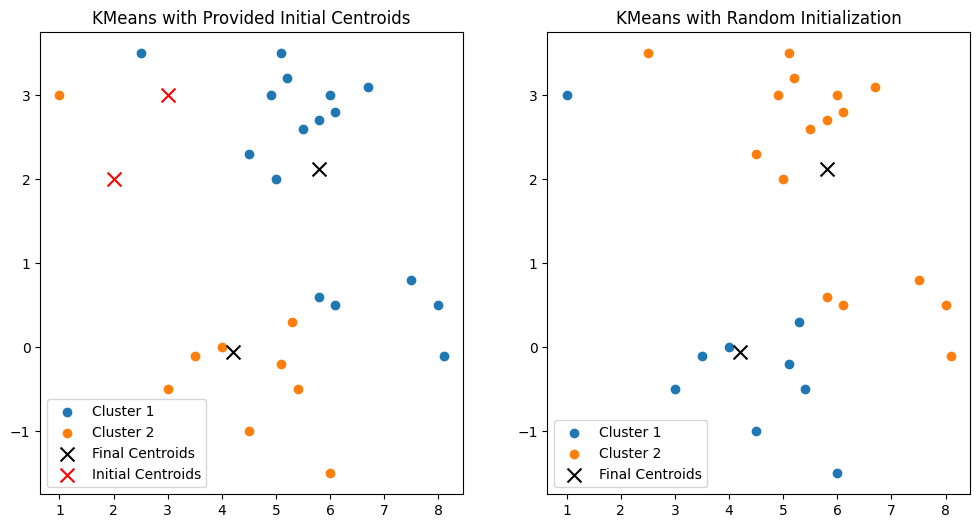

Final Centroids (Provided Initialization):
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]
Final Centroids (Random Initialization):
[[ 4.2        -0.05555556]
 [ 5.8         2.125     ]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculateEuclideanDistance(point1, point2):
    squaredDifference = np.sum((point1 - point2) ** 2)
    return np.sqrt(squaredDifference)

def initializeCentroids(dataPoints, numClusters, initialCentroids=None):
    if initialCentroids is not None:
        return np.array(initialCentroids)
    return dataPoints[np.random.choice(dataPoints.shape[0], numClusters, replace=False)]

def assignClusters(dataPoints, centroids):
    numPoints = dataPoints.shape[0]
    labels = np.zeros(numPoints)

    for i in range(numPoints):
        distances = [calculateEuclideanDistance(dataPoints[i], centroid) for centroid in centroids]
        labels[i] = np.argmin(distances)

    return labels

def updateCentroids(dataPoints, labels, numClusters):
    centroids = np.zeros((numClusters, dataPoints.shape[1]))

    for clusterIndex in range(numClusters):
        clusterPoints = dataPoints[labels == clusterIndex]
        if len(clusterPoints) > 0:
            centroids[clusterIndex] = np.mean(clusterPoints, axis=0)

    return centroids

def hasConverged(oldCentroids, newCentroids, threshold):
    centroidShift = np.sum(np.abs(newCentroids - oldCentroids))
    return centroidShift < threshold

def runKMeans(dataPoints, numClusters=2, maxIterations=100, threshold=1e-4, initialCentroids=None):
    centroids = initializeCentroids(dataPoints, numClusters, initialCentroids)
    prevCentroids = np.copy(centroids)
    labels = np.zeros(dataPoints.shape[0])

    for iteration in range(maxIterations):
        labels = assignClusters(dataPoints, centroids)
        newCentroids = updateCentroids(dataPoints, labels, numClusters)

        if hasConverged(prevCentroids, newCentroids, threshold):
            print(f"Convergence reached at iteration {iteration + 1}")
            break

        prevCentroids = np.copy(newCentroids)
        centroids = newCentroids

    return centroids, labels

def plotKMeansResults(dataPoints, initialCentroids, finalCentroidsProvided, labelsProvided, finalCentroidsRandom, labelsRandom):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("KMeans with Provided Initial Centroids")
    plotCluster(dataPoints, labelsProvided, finalCentroidsProvided, initialCentroids, "red")

    plt.subplot(1, 2, 2)
    plt.title("KMeans with Random Initialization")
    plotCluster(dataPoints, labelsRandom, finalCentroidsRandom)

    plt.show()

def plotCluster(dataPoints, labels, centroids, initialCentroids=None, initialColor=None):
    numClusters = len(np.unique(labels))

    for clusterIndex in range(numClusters):
        clusterPoints = dataPoints[labels == clusterIndex]
        plt.scatter(clusterPoints[:, 0], clusterPoints[:, 1], label=f"Cluster {clusterIndex + 1}")

    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label="Final Centroids")

    if initialCentroids is not None:
        plt.scatter(initialCentroids[:, 0], initialCentroids[:, 1], c=initialColor, marker='x', s=100, label="Initial Centroids")

    plt.legend()

initialCentroids = np.array([[3.0, 3.0], [2.0, 2.0]])

finalCentroidsProvided, labelsProvided = runKMeans(X, initialCentroids=initialCentroids)

finalCentroidsRandom, labelsRandom = runKMeans(X)

plotKMeansResults(X, initialCentroids, finalCentroidsProvided, labelsProvided, finalCentroidsRandom, labelsRandom)

print("Final Centroids (Provided Initialization):")
print(finalCentroidsProvided)

print("Final Centroids (Random Initialization):")
print(finalCentroidsRandom)


## 4. The optimal number of clusters using the Elbow method.

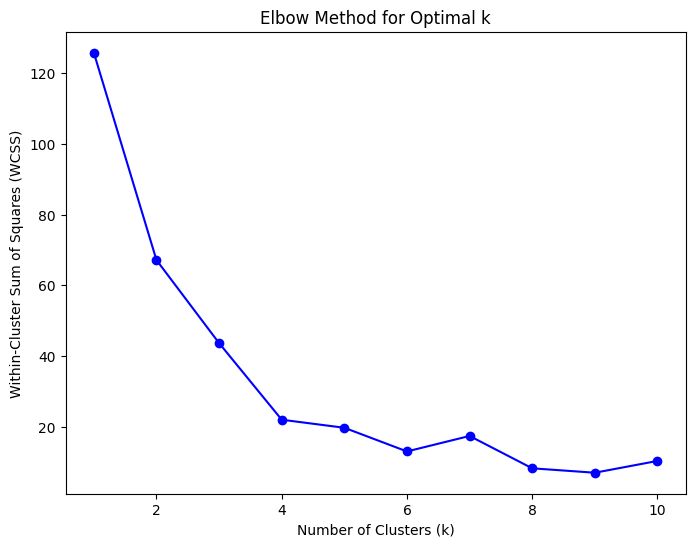

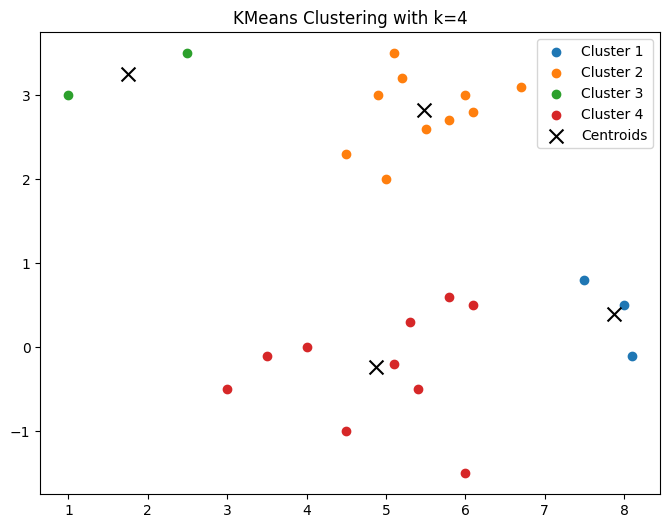

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def computeEuclideanDistance(point1, point2):
    squaredDifference = np.sum((point1 - point2) ** 2)
    return np.sqrt(squaredDifference)

def initializeCentroids(dataPoints, numClusters, initialCentroids=None):
    if initialCentroids is not None:
        return np.array(initialCentroids)
    return dataPoints[np.random.choice(dataPoints.shape[0], numClusters, replace=False)]

def assignClusters(dataPoints, centroids):
    labels = np.zeros(dataPoints.shape[0])
    for i in range(dataPoints.shape[0]):
        distances = [computeEuclideanDistance(dataPoints[i], centroid) for centroid in centroids]
        labels[i] = np.argmin(distances)
    return labels

def updateCentroids(dataPoints, labels, numClusters):
    centroids = np.zeros((numClusters, dataPoints.shape[1]))
    for clusterIndex in range(numClusters):
        clusterPoints = dataPoints[labels == clusterIndex]
        if len(clusterPoints) > 0:
            centroids[clusterIndex] = np.mean(clusterPoints, axis=0)
    return centroids

def checkConvergence(oldCentroids, newCentroids, threshold):
    centroidShift = np.sum(np.abs(newCentroids - oldCentroids))
    return centroidShift < threshold

def computeWCSS(dataPoints, centroids, labels, numClusters):
    wcss = 0
    for clusterIndex in range(numClusters):
        clusterPoints = dataPoints[labels == clusterIndex]
        for point in clusterPoints:
            wcss += computeEuclideanDistance(point, centroids[clusterIndex]) ** 2
    return wcss

def runKMeans(dataPoints, numClusters=2, maxIterations=100, threshold=1e-4, initialCentroids=None):
    centroids = initializeCentroids(dataPoints, numClusters, initialCentroids)
    prevCentroids = np.copy(centroids)
    labels = np.zeros(dataPoints.shape[0])

    for iteration in range(maxIterations):
        labels = assignClusters(dataPoints, centroids)
        newCentroids = updateCentroids(dataPoints, labels, numClusters)
        if checkConvergence(prevCentroids, newCentroids, threshold):
            break
        prevCentroids = np.copy(newCentroids)
        centroids = newCentroids

    wcss = computeWCSS(dataPoints, centroids, labels, numClusters)
    return centroids, labels, wcss

def plotElbowMethod(kValues, wcssValues):
    plt.figure(figsize=(8, 6))
    plt.plot(kValues, wcssValues, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.show()

def plotClusters(dataPoints, centroids, labels, numClusters):
    plt.figure(figsize=(8, 6))
    for clusterIndex in range(numClusters):
        clusterPoints = dataPoints[labels == clusterIndex]
        plt.scatter(clusterPoints[:, 0], clusterPoints[:, 1], label=f"Cluster {clusterIndex + 1}")
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label="Centroids")
    plt.title(f"KMeans Clustering with k={numClusters}")
    plt.legend()
    plt.show()

kRange = range(1, 11)
wcssValues = []

for k in kRange:
    _, _, wcss = runKMeans(X, numClusters=k)
    wcssValues.append(wcss)

plotElbowMethod(kRange, wcssValues)

optimalK = 4
finalCentroids, labels, _ = runKMeans(X, numClusters=optimalK)
plotClusters(X, finalCentroids, labels, optimalK)


# **SECTION-C**

## **1. Data Preparation**

In [64]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Dataset

class CustomCIFAR10Dataset(Dataset):
    def __init__(self, dataset, classIndices):
        self.dataset = dataset
        self.classIndices = classIndices
        self.filteredIndices = self._filterDataset()

    def _filterDataset(self):
        indices = []
        for i, (_, label) in enumerate(self.dataset):
            if label in self.classIndices:
                indices.append(i)
        return indices

    def __len__(self):
        return len(self.filteredIndices)

    def __getitem__(self, idx):
        actualIdx = self.filteredIndices[idx]
        img, label = self.dataset[actualIdx]
        label = self.classIndices.index(label)
        return img, label

def getTransforms():
    return transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

def loadCIFAR10Data(root, transform, train):
    return datasets.CIFAR10(root=root, train=train, download=True, transform=transform)

def createCustomDataset(originalDataset, selectedClasses):
    return CustomCIFAR10Dataset(originalDataset, selectedClasses)

def stratifiedSplit(dataset, trainRatio=0.8, seed=42):
    datasetSize = len(dataset)
    trainSize = int(trainRatio * datasetSize)
    valSize = datasetSize - trainSize

    torch.manual_seed(seed)
    trainSubset, valSubset = random_split(dataset, [trainSize, valSize])
    return trainSubset, valSubset

def createDataLoader(dataset, batchSize, shuffle, numWorkers=2):
    return DataLoader(dataset, batch_size=batchSize, shuffle=shuffle, num_workers=numWorkers)

selectedClasses = [0, 1, 2]
transform = getTransforms()

trainDatasetFull = loadCIFAR10Data(root="./data", transform=transform, train=True)
testDatasetFull = loadCIFAR10Data(root="./data", transform=transform, train=False)

trainDataset = createCustomDataset(trainDatasetFull, selectedClasses)
testDataset = createCustomDataset(testDatasetFull, selectedClasses)

trainSubset, valSubset = stratifiedSplit(trainDataset, trainRatio=0.8, seed=42)

trainLoader = createDataLoader(trainSubset, batchSize=64, shuffle=True)
valLoader = createDataLoader(valSubset, batchSize=64, shuffle=False)
testLoader = createDataLoader(testDataset, batchSize=64, shuffle=False)

print(f"Train dataset size: {len(trainSubset)}")
print(f"Validation dataset size: {len(valSubset)}")
print(f"Test dataset size: {len(testDataset)}")


Files already downloaded and verified
Files already downloaded and verified
Train dataset size: 12000
Validation dataset size: 3000
Test dataset size: 3000


## **2. Visualization**

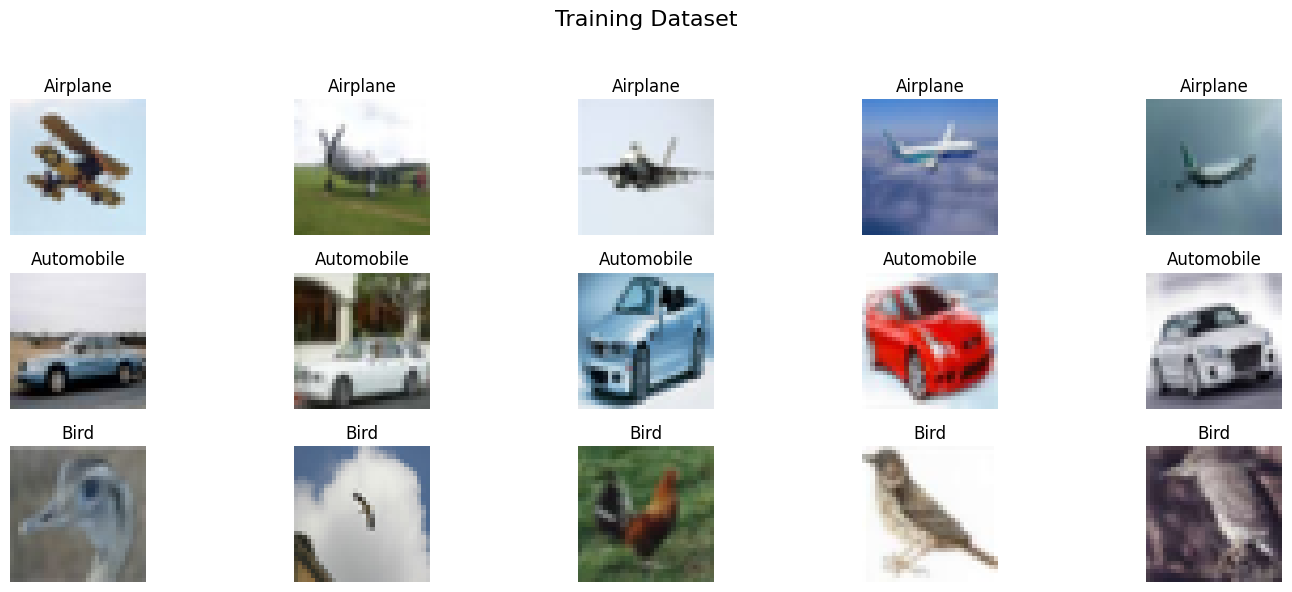

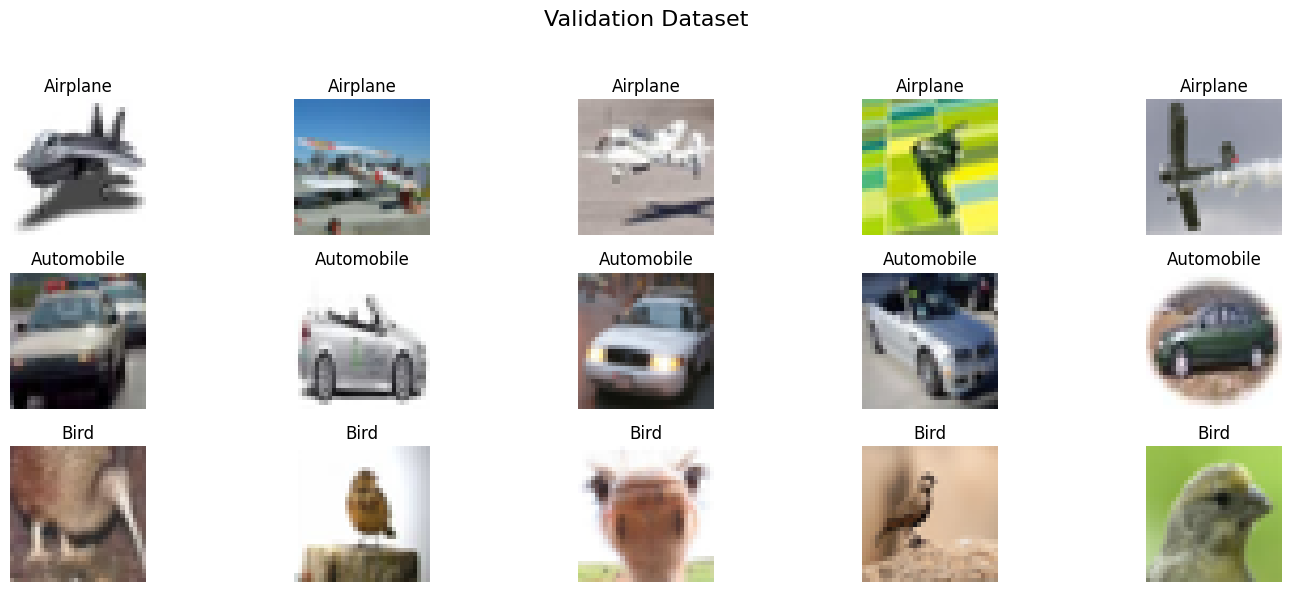

In [65]:
import matplotlib.pyplot as plt

def prepareImageForPlotting(image):
    image = image.permute(1, 2, 0).numpy()
    image = (image * 0.5) + 0.5
    return image

def createSubplots(numClasses, numImagesPerClass, title):
    fig, axs = plt.subplots(numClasses, numImagesPerClass, figsize=(15, numClasses * 2))
    fig.suptitle(title, fontsize=16)
    axs = axs.ravel()
    return fig, axs

def initializeClassCounters(numClasses):
    return {classIdx: 0 for classIdx in range(numClasses)}

def visualizeImages(dataset, classNames, numImagesPerClass=5, title="Dataset Visualization"):
    numClasses = len(classNames)
    fig, axs = createSubplots(numClasses, numImagesPerClass, title)
    classImageCounts = initializeClassCounters(numClasses)

    for img, label in dataset:
        if classImageCounts[label] < numImagesPerClass:
            subplotIndex = label * numImagesPerClass + classImageCounts[label]
            imgForPlotting = prepareImageForPlotting(img)
            axs[subplotIndex].imshow(imgForPlotting)
            axs[subplotIndex].axis("off")
            axs[subplotIndex].set_title(classNames[label])
            classImageCounts[label] += 1

        if all(count == numImagesPerClass for count in classImageCounts.values()):
            break

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

classNames = ["Airplane", "Automobile", "Bird"]

visualizeImages(trainSubset, classNames, numImagesPerClass=5, title="Training Dataset")
visualizeImages(valSubset, classNames, numImagesPerClass=5, title="Validation Dataset")


## **3. CNN Implementation**

In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self, numClasses):
        super(CNNModel, self).__init__()
        self.conv1 = self._createConvLayer(inChannels=3, outChannels=16, kernelSize=5, stride=1, padding=1)
        self.pool1 = self._createPoolingLayer(kernelSize=3, stride=2)
        self.conv2 = self._createConvLayer(inChannels=16, outChannels=32, kernelSize=3, stride=1, padding=0)
        self.pool2 = self._createPoolingLayer(kernelSize=3, stride=3)
        self.flattenedSize = self._calculateFlattenedSize(inputShape=(3, 32, 32))
        self.fc1 = self._createFullyConnectedLayer(inputSize=self.flattenedSize, outputSize=16)
        self.fc2 = self._createFullyConnectedLayer(inputSize=16, outputSize=numClasses)

    def _createConvLayer(self, inChannels, outChannels, kernelSize, stride, padding):
        return nn.Conv2d(inChannels, outChannels, kernelSize, stride, padding)

    def _createPoolingLayer(self, kernelSize, stride):
        return nn.MaxPool2d(kernelSize, stride)

    def _createFullyConnectedLayer(self, inputSize, outputSize):
        return nn.Linear(inputSize, outputSize)

    def _calculateFlattenedSize(self, inputShape):
        dummyInput = torch.zeros(1, *inputShape)
        output = self.pool1(F.relu(self.conv1(dummyInput)))
        output = self.pool2(F.relu(self.conv2(output)))
        return output.numel()

    def _forwardConvolutionalLayers(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        return x

    def _forwardFullyConnectedLayers(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def forward(self, x):
        x = self._forwardConvolutionalLayers(x)
        x = torch.flatten(x, start_dim=1)
        x = self._forwardFullyConnectedLayers(x)
        return x


## **4. Training the model**

In [67]:
import torch
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.utils.tensorboard import SummaryWriter

def trainOneEpoch(model, trainLoader, criterion, optimizer, device):
    model.train()
    totalLoss = 0.0
    correctPredictions = 0
    totalSamples = 0

    for images, labels in trainLoader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        totalLoss += loss.item() * images.size(0)
        _, predictions = torch.max(outputs, 1)
        correctPredictions += (predictions == labels).sum().item()
        totalSamples += labels.size(0)

    averageLoss = totalLoss / totalSamples
    accuracy = correctPredictions / totalSamples
    return averageLoss, accuracy


def validateModel(model, valLoader, criterion, device):
    model.eval()
    totalLoss = 0.0
    correctPredictions = 0
    totalSamples = 0

    with torch.no_grad():
        for images, labels in valLoader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            totalLoss += loss.item() * images.size(0)
            _, predictions = torch.max(outputs, 1)
            correctPredictions += (predictions == labels).sum().item()
            totalSamples += labels.size(0)

    averageLoss = totalLoss / totalSamples
    accuracy = correctPredictions / totalSamples
    return averageLoss, accuracy


def saveModel(model, filePath, message="Model saved"):
    torch.save(model.state_dict(), filePath)
    print(message)


def trainModel(model, trainLoader, valLoader, criterion, optimizer, numEpochs, device):
    bestValLoss = float("inf")
    writer = SummaryWriter(log_dir="./logs")

    for epoch in range(numEpochs):
        print(f"Epoch {epoch + 1}/{numEpochs}")

        trainLoss, trainAccuracy = trainOneEpoch(model, trainLoader, criterion, optimizer, device)
        valLoss, valAccuracy = validateModel(model, valLoader, criterion, device)

        print(
            f"Train Loss: {trainLoss:.4f}, Train Accuracy: {trainAccuracy:.4f}, "
            f"Val Loss: {valLoss:.4f}, Val Accuracy: {valAccuracy:.4f}"
        )

        writer.add_scalar("Loss/Train", trainLoss, epoch)
        writer.add_scalar("Loss/Validation", valLoss, epoch)
        writer.add_scalar("Accuracy/Train", trainAccuracy, epoch)
        writer.add_scalar("Accuracy/Validation", valAccuracy, epoch)

        if valLoss < bestValLoss:
            bestValLoss = valLoss
            saveModel(model, "./best_model.pth", message=f"Best model saved at epoch {epoch + 1}")

    saveModel(model, "./final_model.pth", message="Final model saved.")
    writer.close()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel(numClasses=3).to(device)

criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)
numEpochs = 15

trainModel(model, trainLoader, valLoader, criterion, optimizer, numEpochs, device)


Epoch 1/15
Train Loss: 0.7458, Train Accuracy: 0.6713, Val Loss: 0.5634, Val Accuracy: 0.7817
Best model saved at epoch 1
Epoch 2/15
Train Loss: 0.5171, Train Accuracy: 0.7963, Val Loss: 0.4982, Val Accuracy: 0.8080
Best model saved at epoch 2
Epoch 3/15
Train Loss: 0.4610, Train Accuracy: 0.8193, Val Loss: 0.4453, Val Accuracy: 0.8237
Best model saved at epoch 3
Epoch 4/15
Train Loss: 0.4148, Train Accuracy: 0.8381, Val Loss: 0.4200, Val Accuracy: 0.8367
Best model saved at epoch 4
Epoch 5/15
Train Loss: 0.3878, Train Accuracy: 0.8521, Val Loss: 0.4221, Val Accuracy: 0.8363
Epoch 6/15
Train Loss: 0.3653, Train Accuracy: 0.8582, Val Loss: 0.3833, Val Accuracy: 0.8507
Best model saved at epoch 6
Epoch 7/15
Train Loss: 0.3437, Train Accuracy: 0.8668, Val Loss: 0.3813, Val Accuracy: 0.8550
Best model saved at epoch 7
Epoch 8/15
Train Loss: 0.3254, Train Accuracy: 0.8729, Val Loss: 0.3868, Val Accuracy: 0.8483
Epoch 9/15
Train Loss: 0.3124, Train Accuracy: 0.8822, Val Loss: 0.3465, Val Acc

## **5. Testing**

### Plot Training and Validation Metrics

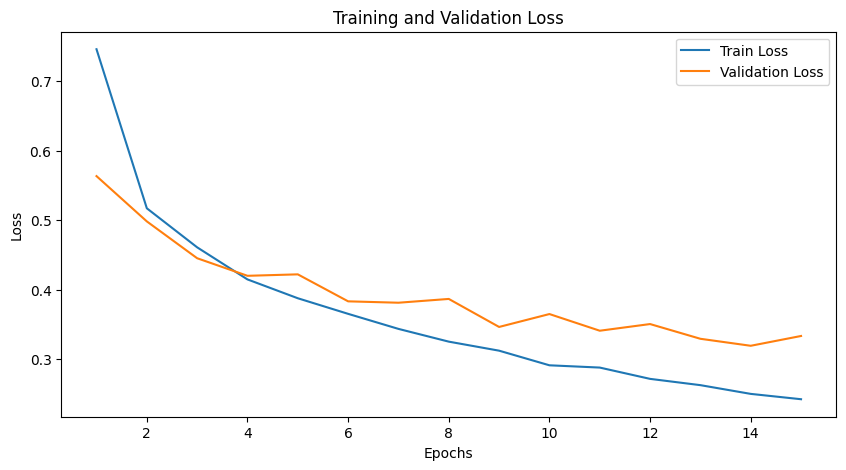

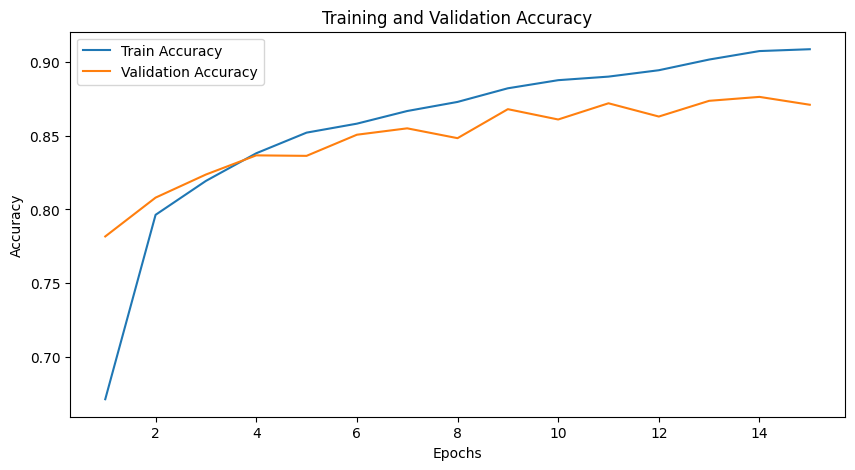

In [79]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def loadTensorboardData(logDir):
    eventAccumulator = EventAccumulator(logDir)
    eventAccumulator.Reload()
    return eventAccumulator

def extractMetricData(eventAccumulator, tag):
    if tag not in eventAccumulator.Tags()["scalars"]:
        print(f"Error: Tag '{tag}' not found in the logs.")
        return None, None

    scalarData = eventAccumulator.Scalars(tag)
    steps = [item.step for item in scalarData]
    values = [item.value for item in scalarData]
    return steps, values

def plotLossAndAccuracy(trainLoss, valLoss, trainAccuracy, valAccuracy, numEpochs):
    epochs = range(1, numEpochs + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, trainLoss, label="Train Loss")
    plt.plot(epochs, valLoss, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, trainAccuracy, label="Train Accuracy")
    plt.plot(epochs, valAccuracy, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.show()

def plotMetrics(logDir="./logs"):
    eventAccumulator = loadTensorboardData(logDir)

    trainLossSteps, trainLoss = extractMetricData(eventAccumulator, "Loss/Train")
    valLossSteps, valLoss = extractMetricData(eventAccumulator, "Loss/Validation")
    trainAccSteps, trainAccuracy = extractMetricData(eventAccumulator, "Accuracy/Train")
    valAccSteps, valAccuracy = extractMetricData(eventAccumulator, "Accuracy/Validation")

    if None in [trainLoss, valLoss, trainAccuracy, valAccuracy]:
        print("Error: Missing data for one or more metrics.")
        return

    if not (trainLossSteps == valLossSteps == trainAccSteps == valAccSteps):
        print("Warning: Steps do not align across metrics. Proceeding with common steps.")

    numEpochs = 15
    trainLoss = trainLoss[:numEpochs]
    valLoss = valLoss[:numEpochs]
    trainAccuracy = trainAccuracy[:numEpochs]
    valAccuracy = valAccuracy[:numEpochs]

    plotLossAndAccuracy(trainLoss, valLoss, trainAccuracy, valAccuracy, numEpochs)

plotMetrics()


### Evaluate Test Dataset Accuracy and F1-Score

In [69]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import torch

def evaluateBatch(model, images, labels, criterion, device):
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)

    loss = criterion(outputs, labels)

    _, preds = torch.max(outputs, 1)
    correct = (preds == labels).sum().item()

    return loss.item(), correct, preds.cpu().numpy(), labels.cpu().numpy()

def evaluateDataloader(model, dataloader, criterion, device):
    model.eval()
    totalLoss = 0.0
    totalCorrect = 0
    totalSamples = 0
    allLabels = []
    allPreds = []

    with torch.no_grad():
        for images, labels in dataloader:
            loss, correct, preds, labels = evaluateBatch(model, images, labels, criterion, device)

            totalLoss += loss * images.size(0)
            totalCorrect += correct
            totalSamples += labels.size

            allLabels.extend(labels)
            allPreds.extend(preds)

    avgLoss = totalLoss / totalSamples
    accuracy = totalCorrect / totalSamples
    f1Score = f1_score(allLabels, allPreds, average="weighted")

    return avgLoss, accuracy, f1Score, allLabels, allPreds

def displayResults(loss, accuracy, f1Score):
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test F1-Score: {f1Score:.4f}")

def loadModel(model, path, device):
    model.load_state_dict(torch.load(path))
    return model.to(device)

model = loadModel(model, "./final_model.pth", device)
testLoss, testAccuracy, testF1, testLabels, testPreds = evaluateDataloader(model, testLoader, criterion, device)
displayResults(testLoss, testAccuracy, testF1)


<ipython-input-69-8a69f480333f>:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


Test Loss: 0.3294
Test Accuracy: 0.8703
Test F1-Score: 0.8698


### Plot Confusion Matrices for Train, Val, and Test Datasets

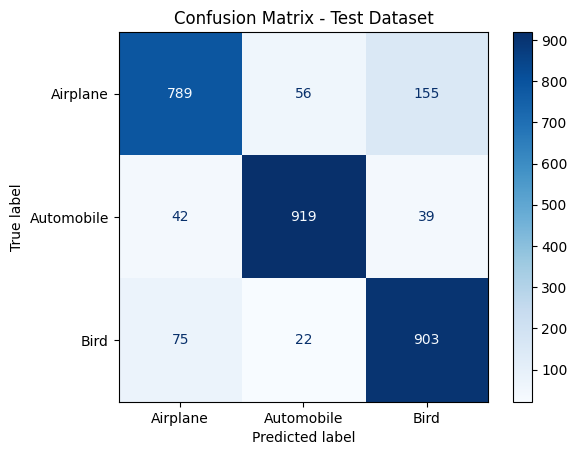

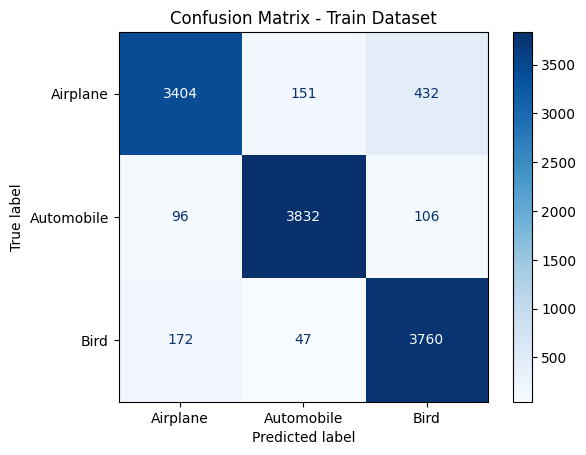

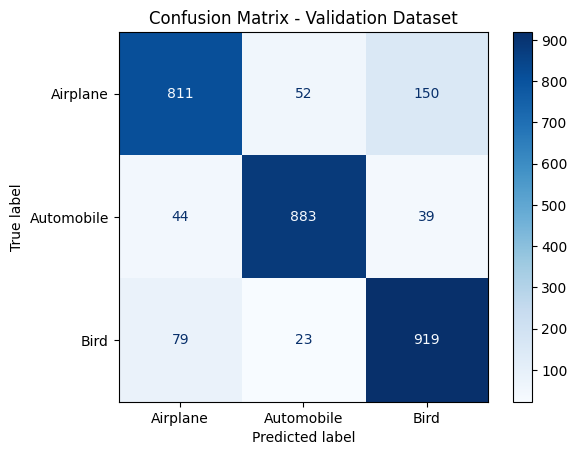

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def computeConfusionMatrix(labels, preds):
    return confusion_matrix(labels, preds)

def plotConfusionMatrix(cm, classNames, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classNames)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

def evaluateAndPlotConfusionMatrix(model, dataloader, criterion, device, classNames, title):
    _, _, _, labels, preds = evaluateDataloader(model, dataloader, criterion, device)
    cm = computeConfusionMatrix(labels, preds)
    plotConfusionMatrix(cm, classNames, title)

classNames = ["Airplane", "Automobile", "Bird"]

evaluateAndPlotConfusionMatrix(model, testLoader, criterion, device, classNames, title="Confusion Matrix - Test Dataset")
evaluateAndPlotConfusionMatrix(model, trainLoader, criterion, device, classNames, title="Confusion Matrix - Train Dataset")
evaluateAndPlotConfusionMatrix(model, valLoader, criterion, device, classNames, title="Confusion Matrix - Validation Dataset")


## **6. Training an MLP**

### Define the MLP Model

In [71]:
import torch
import torch.nn as nn

def createFirstLayer(inputSize, hiddenSize):
    return nn.Linear(inputSize, hiddenSize)

def createClassificationHead(hiddenSize, numClasses):
    return nn.Linear(hiddenSize, numClasses)

def createActivationFunction():
    return nn.ReLU()

class MLPModel(nn.Module):
    def __init__(self, inputSize, hiddenSize, numClasses):
        super(MLPModel, self).__init__()
        self.fc1 = createFirstLayer(inputSize, hiddenSize)
        self.relu = createActivationFunction()
        self.fc2 = createClassificationHead(hiddenSize, numClasses)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def createMLPModel(inputSize, hiddenSize, numClasses, device):
    model = MLPModel(inputSize, hiddenSize, numClasses)
    model = model.to(device)
    return model

def printModelArchitecture(model):
    print("Model Architecture:")
    print(model)

inputSize = 32 * 32 * 3
hiddenSize = 64
numClasses = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

mlpModel = createMLPModel(inputSize, hiddenSize, numClasses, device)
printModelArchitecture(mlpModel)


Model Architecture:
MLPModel(
  (fc1): Linear(in_features=3072, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=3, bias=True)
)


### Training the MLP Model

In [72]:
import torch
from torch.nn import CrossEntropyLoss
from torch.optim import Adam

def trainOneEpoch(model, trainLoader, criterion, optimizer, device):
    model.train()
    totalLoss = 0.0
    correctPredictions = 0
    totalSamples = 0

    for images, labels in trainLoader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        totalLoss += loss.item() * images.size(0)
        _, predictions = torch.max(outputs, 1)
        correctPredictions += (predictions == labels).sum().item()
        totalSamples += labels.size(0)

    averageLoss = totalLoss / totalSamples
    accuracy = correctPredictions / totalSamples
    return averageLoss, accuracy

def validateModel(model, valLoader, criterion, device):
    model.eval()
    totalLoss = 0.0
    correctPredictions = 0
    totalSamples = 0

    with torch.no_grad():
        for images, labels in valLoader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            totalLoss += loss.item() * images.size(0)
            _, predictions = torch.max(outputs, 1)
            correctPredictions += (predictions == labels).sum().item()
            totalSamples += labels.size(0)

    averageLoss = totalLoss / totalSamples
    accuracy = correctPredictions / totalSamples
    return averageLoss, accuracy

def saveModel(model, filePath, message="Model saved"):
    torch.save(model.state_dict(), filePath)
    print(message)

def trainMLPModel(model, trainLoader, valLoader, criterion, optimizer, numEpochs, device):
    bestValLoss = float("inf")

    for epoch in range(numEpochs):
        print(f"Epoch {epoch + 1}/{numEpochs}")

        trainLoss, trainAccuracy = trainOneEpoch(model, trainLoader, criterion, optimizer, device)

        valLoss, valAccuracy = validateModel(model, valLoader, criterion, device)

        print(
            f"Train Loss: {trainLoss:.4f}, Train Accuracy: {trainAccuracy:.4f}, "
            f"Val Loss: {valLoss:.4f}, Val Accuracy: {valAccuracy:.4f}"
        )

        if valLoss < bestValLoss:
            bestValLoss = valLoss
            saveModel(model, "./best_mlp_model.pth", message=f"Best model saved at epoch {epoch + 1}")

    saveModel(model, "./final_mlp_model.pth", message="Final MLP model saved.")

criterion = CrossEntropyLoss()
optimizer = Adam(mlpModel.parameters(), lr=0.001)

numEpochs = 15

trainMLPModel(mlpModel, trainLoader, valLoader, criterion, optimizer, numEpochs, device)


Epoch 1/15
Train Loss: 0.6841, Train Accuracy: 0.7179, Val Loss: 0.6499, Val Accuracy: 0.7403
Best model saved at epoch 1
Epoch 2/15
Train Loss: 0.5649, Train Accuracy: 0.7773, Val Loss: 0.6175, Val Accuracy: 0.7600
Best model saved at epoch 2
Epoch 3/15
Train Loss: 0.5064, Train Accuracy: 0.8030, Val Loss: 0.5971, Val Accuracy: 0.7667
Best model saved at epoch 3
Epoch 4/15
Train Loss: 0.4601, Train Accuracy: 0.8175, Val Loss: 0.5864, Val Accuracy: 0.7670
Best model saved at epoch 4
Epoch 5/15
Train Loss: 0.4260, Train Accuracy: 0.8363, Val Loss: 0.5889, Val Accuracy: 0.7753
Epoch 6/15
Train Loss: 0.3907, Train Accuracy: 0.8531, Val Loss: 0.5818, Val Accuracy: 0.7740
Best model saved at epoch 6
Epoch 7/15
Train Loss: 0.3660, Train Accuracy: 0.8622, Val Loss: 0.6088, Val Accuracy: 0.7803
Epoch 8/15
Train Loss: 0.3417, Train Accuracy: 0.8728, Val Loss: 0.6088, Val Accuracy: 0.7767
Epoch 9/15
Train Loss: 0.3097, Train Accuracy: 0.8832, Val Loss: 0.6058, Val Accuracy: 0.7860
Epoch 10/15
Tr

## **7. Infer and Compare**

### Evaluate MLP Model on Test Data

In [73]:
import torch
from sklearn.metrics import f1_score

def loadModel(model, filePath, device):
    model.load_state_dict(torch.load(filePath))
    model = model.to(device)
    print(f"Model loaded from {filePath}")
    return model

def evaluateDataloader(model, dataLoader, criterion, device):
    model.eval()
    totalLoss = 0.0
    correctPredictions = 0
    totalSamples = 0
    allLabels = []
    allPredictions = []

    with torch.no_grad():
        for images, labels in dataLoader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            totalLoss += loss.item() * images.size(0)
            _, predictions = torch.max(outputs, 1)
            correctPredictions += (predictions == labels).sum().item()
            totalSamples += labels.size(0)

            allLabels.extend(labels.cpu().numpy())
            allPredictions.extend(predictions.cpu().numpy())

    averageLoss = totalLoss / totalSamples
    accuracy = correctPredictions / totalSamples
    f1Score = f1_score(allLabels, allPredictions, average="weighted")

    return averageLoss, accuracy, f1Score, allLabels, allPredictions

def printEvaluationMetrics(loss, accuracy, f1Score, modelName="Model"):
    print(
        f"{modelName} Test Performance:\n"
        f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, F1-Score: {f1Score:.4f}"
    )

mlpModel = loadModel(mlpModel, "./best_mlp_model.pth", device)

mlpTestLoss, mlpTestAccuracy, mlpTestF1, mlpTestLabels, mlpTestPreds = evaluateDataloader(
    mlpModel, testLoader, criterion, device
)

printEvaluationMetrics(mlpTestLoss, mlpTestAccuracy, mlpTestF1, modelName="MLP")


Model loaded from ./best_mlp_model.pth


<ipython-input-73-9cb5ad3197e0>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(filePath))


MLP Test Performance:
Loss: 0.5212, Accuracy: 0.7997, F1-Score: 0.7992


### Plot Confusion Matrix for MLP Model

Confusion Matrix:
[[757  94 149]
 [ 87 855  58]
 [124  89 787]]


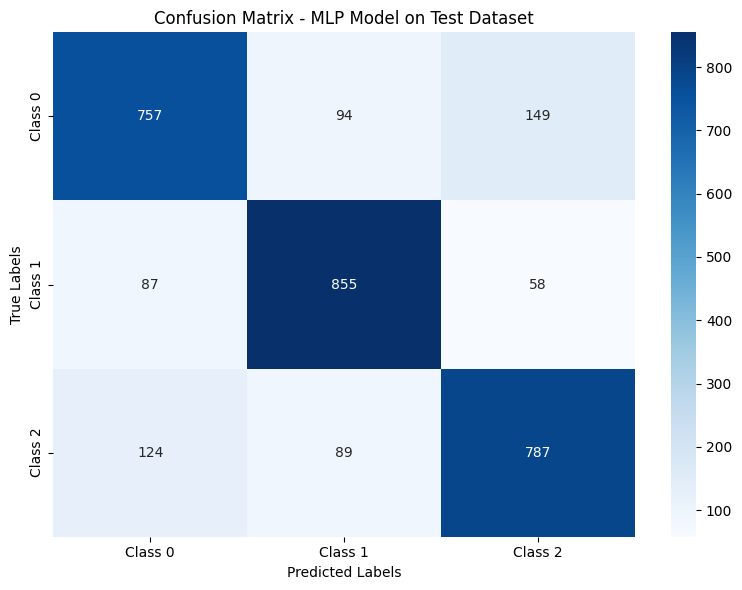

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def computeConfusionMatrix(trueLabels, predictedLabels):
    cm = confusion_matrix(trueLabels, predictedLabels)
    print(f"Confusion Matrix:\n{cm}")
    return cm

def plotConfusionMatrix(cm, classNames, title="Confusion Matrix", cmap="Blues"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=classNames, yticklabels=classNames)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()

def computeAndPlotConfusionMatrix(trueLabels, predictedLabels, classNames, title="Confusion Matrix", cmap="Blues"):
    cm = computeConfusionMatrix(trueLabels, predictedLabels)
    plotConfusionMatrix(cm, classNames, title, cmap)

classNames = ["Class 0", "Class 1", "Class 2"]
computeAndPlotConfusionMatrix(
    mlpTestLabels,
    mlpTestPreds,
    classNames,
    title="Confusion Matrix - MLP Model on Test Dataset"
)


### Compare Results with CNN

Model Performance Comparison:
----------------------------------------------------
Metric          CNN             MLP            
----------------------------------------------------
Test Accuracy   0.8703 |   0.7997
Test F1-Score   0.8698 |   0.7992

Comparing Confusion Matrices:
----------------------------------------------------
CNN Model Confusion Matrix:
Confusion Matrix:
[[789  56 155]
 [ 42 919  39]
 [ 75  22 903]]


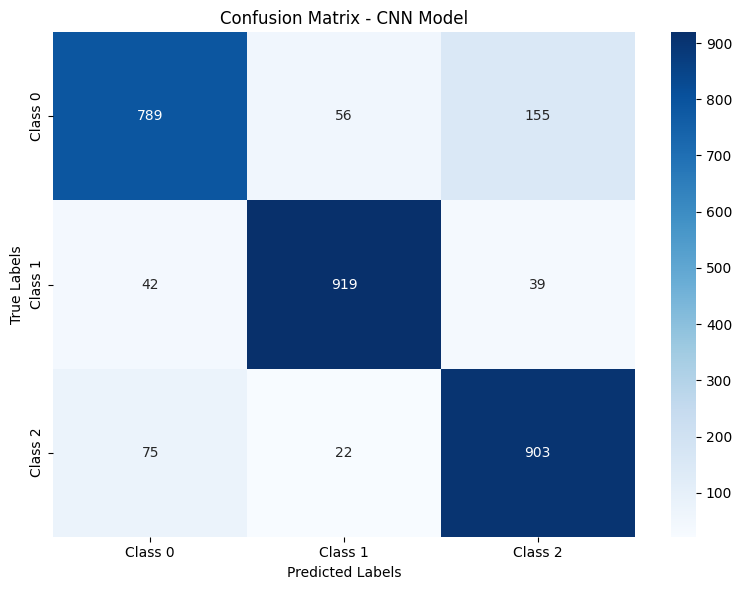

MLP Model Confusion Matrix:
Confusion Matrix:
[[757  94 149]
 [ 87 855  58]
 [124  89 787]]


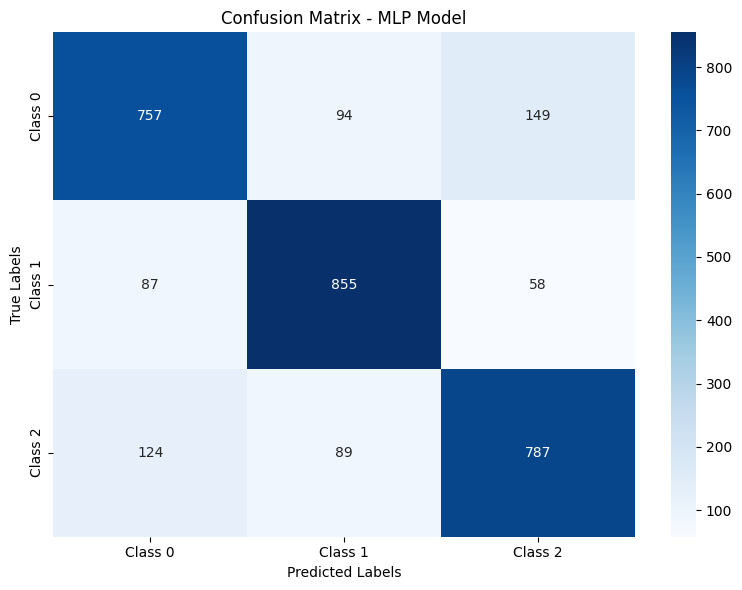

In [75]:
def printModelComparison(cnnMetrics, mlpMetrics):
    print("Model Performance Comparison:")
    print("----------------------------------------------------")
    print(f"{'Metric':<15} {'CNN':<15} {'MLP':<15}")
    print("----------------------------------------------------")
    for metric in cnnMetrics:
        print(f"{metric:<15} {cnnMetrics[metric]:.4f} {'|':<3} {mlpMetrics[metric]:.4f}")

def compareConfusionMatrices(cnnLabels, cnnPreds, mlpLabels, mlpPreds, classNames):
    print("\nComparing Confusion Matrices:")
    print("----------------------------------------------------")

    print("CNN Model Confusion Matrix:")
    cnnCM = computeConfusionMatrix(cnnLabels, cnnPreds)
    plotConfusionMatrix(cnnCM, classNames, title="Confusion Matrix - CNN Model")

    print("MLP Model Confusion Matrix:")
    mlpCM = computeConfusionMatrix(mlpLabels, mlpPreds)
    plotConfusionMatrix(mlpCM, classNames, title="Confusion Matrix - MLP Model")

cnnMetrics = {
    "Test Accuracy": testAccuracy,
    "Test F1-Score": testF1,
}
cnnLabels = testLabels
cnnPreds = testPreds

mlpMetrics = {
    "Test Accuracy": mlpTestAccuracy,
    "Test F1-Score": mlpTestF1,
}
mlpLabels = mlpTestLabels
mlpPreds = mlpTestPreds

classNames = ["Class 0", "Class 1", "Class 2"]

printModelComparison(cnnMetrics, mlpMetrics)
compareConfusionMatrices(cnnLabels, cnnPreds, mlpLabels, mlpPreds, classNames)
